In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Loading MNIST dataset from SciKit-Learn

In [3]:
digits = datasets.load_digits()

# Visualize images from the Dataset

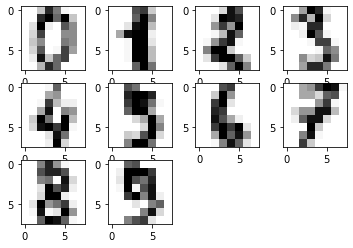

In [8]:
example_images = tuple(zip(digits.images[:10], digits.target))

for i, (idata, ilabel) in enumerate(example_images):
    sub = plt.subplot(3, 4, i+1)
    sub.imshow(idata, cmap='Greys')

# Create Classification Model to Predict Digits

## Re-Shape Data for Input

In [9]:
mnist_input = digits.images.reshape((len(digits.images), -1))

# Create SVC Model

In [10]:
x_train, x_test, y_train, y_test = train_test_split(mnist_input, digits.target, test_size = 0.3, shuffle = False)

In [11]:
mnist_svm = svm.SVC()
mnist_svm.fit(x_train, y_train)
mnist_svm.score(x_test, y_test)

0.9537037037037037

# Using Random Forest

In [12]:
mnist_rf = RandomForestClassifier()
mnist_rf.fit(x_train, y_train)
mnist_rf.score(x_test, y_test)

0.9203703703703704

# Applying Model to Data and Visualize Results

In [14]:
# Applying SVC model to create set of 'predictions'
predictions_svm = mnist_svm.predict(x_test)

# Create a structure including sample images, predictions, and labels
example_predictions_svm = tuple(
    zip(digits.images[len(x_train):], predictions_svm, y_test))

# Check resulting structure to ensure that data combined correctly
example_incorrect_predictions_svm = tuple(
    filter(lambda v: v[1] != v[2], example_predictions_svm))

# Correctly Matched Images

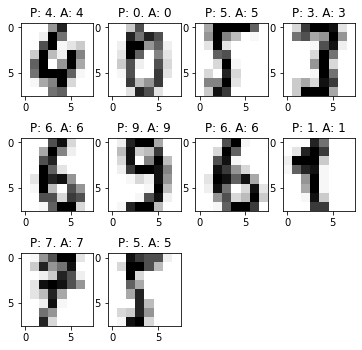

In [15]:
plt.figure(figsize = (6, 6))

# visualize correctly matched images
for i, (idata, p, ilabel) in enumerate(example_predictions_svm[:10]):
    sub = plt.subplot(3, 4, i+1)
    sub.imshow(idata, cmap='Greys')
    plt.title('P: %s. A: %s' % (p, ilabel))

# Incorrectly Matched Images

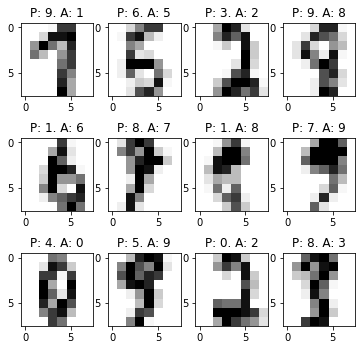

In [16]:
plt.figure(figsize=(6, 6))

# Visualize correctly matched images
for i, (idata, p, ilabel) in enumerate(example_incorrect_predictions_svm[:12]):
    sub = plt.subplot(3, 4, i+1)
    sub.imshow(idata, cmap='Greys')
    plt.title('P: %s. A: %s' % (p, ilabel))